In [1]:
using Plots; plotlyjs(); default(framestyle = :none, legend = :none, l=2)
using LinearAlgebra;
using Statistics;
using Combinatorics;
import Logging; Logging.disable_logging(Logging.Info);

WebIO._IJuliaInit()

In [2]:
function regular_grid(n, r)
    λ = zeros(n + 1, binomial(n+r, r))
    for (i,α) in enumerate(multiexponents(n+1, r))
        λ[:,i] = α / r
    end
    return λ
end

regular_grid (generic function with 1 method)

<center>
    
# Unifying the Analysis of Geometric Decomposition in FEEC

#### Toby Isaac · Georgia Tech
    
##### MFEM@LLNL · March 22, 2022 · <https://tinyurl.com/isaac-feec-mfem>

![moving_indicatrix.gif](./moving_indicatrix.gif)
    
</center>

### 2007-2017: * * crickets * *
![](./atx.png)

(Arbogast, Babuska, Demkowicz, Hughes, Oden, Wheeler, ...)

## 2017-present: "Mixed finite elements!"

![](./atl.png)

# Outline

1. **Geometric decomposition of scalar polynomials**

2. **Exterior calculus on simplices**

3. **Trace-free $\cong$ unrestricted isomorphisms**

4. **Extension operators**

# Introduction: geometric decomposition of scalar polynomials

## Task: _extend_ a smooth function $f$ from a boundary edge $e$ into a triangle $T$

In [20]:
T = [[1, 0, 0] [cos(2π/3), sin(2π/3), 0] [cos(4π/3), sin(4π/3), 0]]
cycle = [1,2,3,1]
p = plot(T[1,cycle], T[2,cycle], T[3,cycle], c=1)
s = LinRange(0,1,40)
f = sin.(3π.*s)
x = T[1:2,1:2] *  [(1 .- s)  s]'
plot!(p, x[1,:], x[2,:], f, c = 2, size=(600,650))

Find a function $F \in C^\infty(\overline{T})$ such that:

1. $F|_e = f$

2. $F|_{\hat{e}} = 0$ if $\hat{e} \neq e$

For this to be possible $f$ must be zero at the vertices: $f$ is **trace-free**, $f\in \mathring{C}^\infty(\overline e)$

If $f \mapsto F$ is linear, you have defined an **extension operator** $E: \mathring{C}^\infty(\overline{e}) \to C^\infty(\overline{T})$, $F = Ef$

Explicitly or implicitly, all local, conforming finite element bases are extensions of trace-free functions

## Observation 1: if $f$ is trace-free, then it contains the _edge bubble_  $\lambda_e$

$$ f = \lambda_e \tilde{f}, \quad \tilde{f} \in C^\infty (\overline e), \quad \lambda_{e} = \lambda_1 \lambda_2, \quad e = \{v_1, v_2\} $$

In [14]:
T = [[1, 0, 0] [cos(2π/3), sin(2π/3), 0] [cos(4π/3), sin(4π/3), 0]]
cycle = [1,2,3,1]
p = plot(T[1,cycle], T[2,cycle], T[3,cycle], c=1)
q = deepcopy(p)
m = deepcopy(p)
s = LinRange(0,1,40)
f = sin.(3π.*s)
x = T[1:2,1:2] *  [(1 .- s)  s]'
plot!(p, x[1,:], x[2,:], f, c = 2, title="= f", l=4)
b = (1 .- s) .* s
plot!(q, x[1,:], x[2,:], b, c = 3, title="⋅ λₑ", l=4)
f̃ = copy(f)
f̃[2:end-1] ./= b[2:end-1]
f̃[1] = 3π
f̃[end] = 3π
plot!(m, x[1,:], x[2,:], f̃, c = 4, title="f̃", l=4)
plot(m,q,p, layout=(1,3), size=(1300, 500))

The edge bubble implements an **isomorphism**: $\lambda_e\cdot: C^\infty(\overline e) \stackrel{\sim}{\rightarrow} \mathring{C}^\infty(\overline{e})$ that defines an inner-product on $C^\infty(\overline e)$:

$$\langle f, \tilde f \rangle = \int_e f \tilde f\ ds = \int_e \lambda_e |\tilde f|^2 \ ds = \|\tilde f\|_{\lambda_e}^2$$

## Observation 2: any _projection_ $P:\overline{T} \to \overline{e}$ defines a pullback $P^*: C^\infty(\overline e) \to C^\infty(\overline{T})$

$$ (P^* f)(x) = f(P(x)) $$

![](./pullback.gif)

Notice: even though $f$ is trace-free, $P^* f$ is not

- Whenever you have an affine-invariant space, the pullback of an affine projection is in the same space

## A two-step extension operator: pullback of $\tilde{f}$ $\cdot$ bubble $=$ extension

In [21]:
λ = regular_grid(2,20)
T = [[1, 0, 0] [cos(2π/3), sin(2π/3), 0] [cos(4π/3), sin(4π/3), 0]]
cycle = [1,2,3,1]
xy = T * λ
s = LinRange(0,1,40)
pullback = sin.(3π.*(λ[1,:] .+ λ[3,:] ./ 2)) ./ (λ[1,:] .+ λ[3,:] ./ 2) ./ (λ[2,:] .+ λ[3,:] ./ 2)
p = plot(T[1,cycle], T[2,cycle], T[3,cycle], c=1)
plot!(p, xy[1,:], xy[2,:], pullback, st=:mesh3d, c=4, title="P*f̃")
λₑ = λ[1,:] .* λ[2,:]
q = plot(T[1,cycle], T[2,cycle], T[3,cycle], c=1, title="⋅ λₑ")
plot!(q, xy[1,:], xy[2,:], λₑ, st=:mesh3d, c=3)
m = plot(T[1,cycle], T[2,cycle], T[3,cycle], c=1)
extension = pullback .* λₑ
plot!(m, xy[1,:], xy[2,:], extension, st=:mesh3d, c=2, title="= F")
plot(p, q, m, layout=(1,3), size=(1300, 500))

All operations are **pointwise**: $(E f)(x)$ can be evaluated by evaluating $\tilde{f}(P(x))$ (can be evaluated by evaluating $f(P(x))$ )

## pullback $\cdot$ bubble is universal and pointwise

- _Universal:_ extends _all smooth trace-free_ functions, not just polynomials
- _Pointwise:_ evaluating $(Ef)(x)$ requires one evaluation of $f(P(x))$: no expansion in a particular basis

## pullback $\cdot$ bubble is composable

Any family of bases of $\mathcal{P}$ implements a geometric decomposition of $\mathcal{P}_r(T)$ 

- Need a basis of the trace-free polynomials $\mathring{\mathcal{P}}_r(T)$?  Use a basis of
$\mathcal{P}_{r-(\mathrm{dim}(T)+1)}(T)$ and multiply by $\lambda_T$

- Need a basis of edge $e$ bubble polynomials?  Pullback a basis of
$\mathcal{P}_{r-(\mathrm{dim}(e)+1)}(e)$ and multiply by $\lambda_e$

- In code: spaces can be built with the decorator pattern

```python
class TraceFreeSpace(UnrestrictedSpace):
    def eval(self, x):
        return super(self).eval(x) * bubble(x)
    
class ExtendedSpace(UnrestrictedSpace):
    def eval(self, x):
        return super(self).eval(self.proj(x)) * bubble(x)
```

## There are good reasons to use other geometric decomposition strategies

1. By geometric decomposition of the dual space functionals (example: PetscFE)

  - ✅ Explicit control over tabulation condition numbers
  - ✅ Symmetric
  - ⚠️ Dense inverse vandermonde matrix

![](./nodes.png)

2. Using **Bernstein bases and extensions** (example: FInAT)

  - ✅ Symmetric
  - ✅ Low-complexity sum-factorization operations
  - ⚠️ Poor condition number scaling

![](./bernstein.png)

(Arnold, Falk, and Winther, doi:10.1016/j.cma.2008.12.017)

3. Using **Dubiner-type extensions** (example: Sherwin & Karniadakis, Nek5000)

  - ✅ Good condition numbers
  - ✅⚠️ Low-complexity sum-factorization operations (with higher memory complexity)
  - ⚠️ Asymmetric bases

![](./pkd.png)

## So what about $H(\text{curl})$ and $H(\text{div})$?

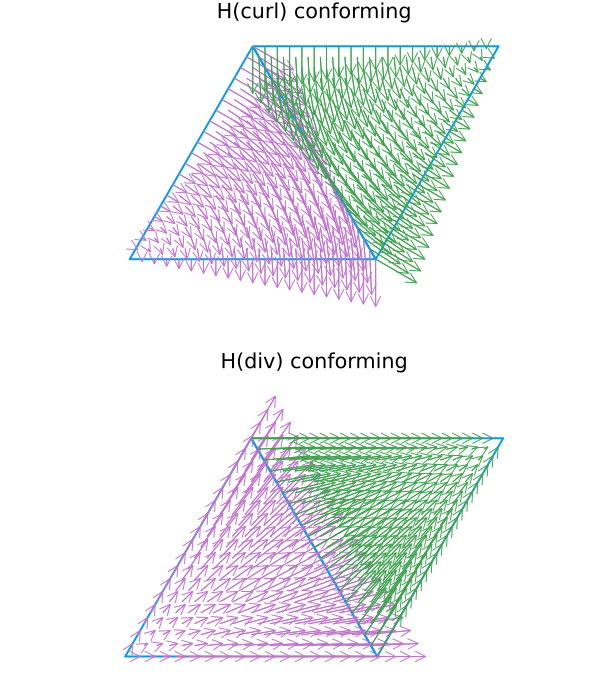

In [6]:
gr();
T₁ = [[0, 1] [sin(4π/3),cos(4π/3)] [sin(2π/3),cos(2π/3)]]
T₂ = [T₁[:,1] T₁[:,3] (T₁[:,1] .+ [sqrt(3),0])]
cycle=[1,2,3,1]
p = plot(T₁[1,cycle], T₁[2,cycle], c=1, aspect_ratio=:equal)
plot!(p, T₂[1,cycle], T₂[2,cycle], c=1)
q = deepcopy(p)
λ = regular_grid(2, 20)
Dλ₁ = pinv(T₁)
Dλ₂ = pinv(T₂ .- mean(T₂,dims=2))
x₁ = T₁ * λ
x₂ = T₂ * λ
u₁ = (λ[1,:] * Dλ₁[3,:]' .- λ[3,:] * Dλ₁[1,:]') .* 0.5
u₂ = (λ[1,:] * Dλ₂[2,:]' .- λ[2,:] * Dλ₂[1,:]') .* 0.5
quiver!(p, x₁[1,:], x₁[2,:], l=1, c=4, quiver=(u₁[:,1], u₁[:,2]))
quiver!(p, x₂[1,:], x₂[2,:], l=1, c=3, quiver=(u₂[:,1], u₂[:,2]), title="H(curl) conforming")
quiver!(q, x₁[1,:], x₁[2,:], l=1, c=4, quiver=(-u₁[:,2], u₁[:,1]))
quiver!(q, x₂[1,:], x₂[2,:], l=1, c=3, quiver=(-u₂[:,2], u₂[:,1]), title="H(div) conforming")
plt = plot(p,q,layout=(2,1), size=(600,700))
plotlyjs()
plt

- Is there a similar operation to $\lambda_e \cdot$ that

  - defines an **isomorphism** trace-free "bubbles" $\cong$ unrestricted fns?
  
  - acts pointwise?
  
  - defines an inner product?
  
- Is there a similar extension operator that

  - acts pointwise?
  
  - defines a geometric decomposition of the finite element spaces in use?

- Can all the cases ($H^1$, $H(\text{curl})$, $H(\text{div})$, $L^2$, others in higher dimensions) be unified into one geometric decomposition via **finite element exterior calculus (FEEC)?**

## _Unifying the geometric decompositions of full and trimmed polynomial spaces in finite element exterior calculus_

### <https://arxiv.org/abs/2112.02174>

# Background: FEEC on simplices

## The de Rham cochain complex

$$ 0 \stackrel{1}{\longrightarrow} H^1(\Omega) \stackrel{\nabla}{\longrightarrow} H(\text{curl};\Omega)
\stackrel{\nabla \times}{\longrightarrow} H(\text{div};\Omega) \stackrel{\nabla \cdot}{\longrightarrow} L^2(\Omega) \longrightarrow 0 $$

- cochain: the range of one arrow is in the nullspace of the next

  - $\nabla 1 = 0$
  - $\nabla\times \nabla \phi = 0$
  - $\nabla\cdot \nabla \times A = 0$

- nullspace${}_{k+1}$ / range${}_k$ encodes the cohomology of $\Omega$ (voids, handles, and pieces)

## Conforming approximations $H_h$ + commuting projections $\Pi_h$  = stable mixed finite elements

$$
\begin{array}{ccccccccccc}
0 & \stackrel{1}{\longrightarrow} & H^1(\Omega) & \stackrel{\nabla}{\longrightarrow} & H(\text{curl};\Omega) & 
\stackrel{\nabla \times}{\longrightarrow} & H(\text{div};\Omega) & \stackrel{\nabla \cdot}{\longrightarrow} & L^2(\Omega) & \longrightarrow &  0 \\
 &  &  \Pi_h \downarrow & & \Pi_h \downarrow & & \Pi_h \downarrow & & \Pi_h \downarrow \\
 0 & \stackrel{1}{\longrightarrow} & H_h^1(\mathcal{T}_h) & \stackrel{\nabla}{\longrightarrow} & H_h(\text{curl};\mathcal{T}_h) & 
\stackrel{\nabla \times}{\longrightarrow} & H_h(\text{div};\mathcal{T}_h) & \stackrel{\nabla \cdot}{\longrightarrow} & L_h^2(\mathcal{T}_h) & \longrightarrow &  0
\end{array}
$$

- Raviart-Thomas
- Brezzi-Douglas-Marini
- $\dots$

- Nédélec
- Arnold-Awanou

## FEEC recognizes the de Rham complex in vector calculus as equivalent to the one in _exterior calculus_

$$
\begin{array}{ccccccccccc}
0 & \stackrel{1}{\longrightarrow} & H^1(\Omega) & \stackrel{\nabla}{\longrightarrow} & H(\text{curl};\Omega) & 
\stackrel{\nabla \times}{\longrightarrow} & H(\text{div};\Omega) & \stackrel{\nabla \cdot}{\longrightarrow} & L^2(\Omega) & \longrightarrow &  0 \\
 &  &  \Pi_h \downarrow & & \Pi_h \downarrow & & \Pi_h \downarrow & & \Pi_h \downarrow \\
 0 & \stackrel{1}{\longrightarrow} & H_h^1(\mathcal{T}_h) & \stackrel{\nabla}{\longrightarrow} & H_h(\text{curl};\mathcal{T}_h) & 
\stackrel{\nabla \times}{\longrightarrow} & H_h(\text{div};\mathcal{T}_h) & \stackrel{\nabla \cdot}{\longrightarrow} & L_h^2(\mathcal{T}_h) & \longrightarrow &  0
\end{array}
$$

$$
\sim
$$

$$
\begin{array}{ccccccccccc}
0 & \stackrel{1}{\longrightarrow} & H \Lambda^0(\Omega) & \stackrel{\mathrm{d}}{\longrightarrow} & H\Lambda^1(\Omega) & 
\stackrel{\mathrm{d}}{\longrightarrow} & H\Lambda^2(\Omega) & \stackrel{\mathrm{d}}{\longrightarrow} & H \Lambda^3(\Omega) & \longrightarrow &  0 \\
 &  &  \Pi_h \downarrow & & \Pi_h \downarrow & & \Pi_h \downarrow & & \Pi_h \downarrow \\
 0 & \stackrel{1}{\longrightarrow} & \Lambda_h^0(\mathcal{T}_h) & \stackrel{\mathrm{d}}{\longrightarrow} & \Lambda_h^1(\mathcal{T}_h) & 
\stackrel{\mathrm{d}}{\longrightarrow} & \Lambda_h^2(\mathcal{T}_h) & \stackrel{\mathrm{d}}{\longrightarrow} & \Lambda_h^3(\mathcal{T}_h) & \longrightarrow &  0
\end{array}
$$

## FEEC $\leftrightarrow$ $\mathbb{R}^3$ Vector Calculus Approximate Translations

**wedge product** $\wedge: \mathrm{Alt}^j \otimes \mathrm{Alt}^k \to \mathrm{Alt}^{j+k}$

| $\wedge$ | $\psi\in\mathrm{Alt}^0$ | $B \in \mathrm{Alt}^1$ | $v \in \mathrm{Alt}^2$ | $\pi \in \mathrm{Alt}^3$ |
| :-: | :-: | :-: | :-: | :-: |
| $\phi\in\mathrm{Alt}^0$ | $\phi \psi$ | $\phi A$ | $\phi v$ | $\boldsymbol{\phi\pi}$ |
| $A\in\mathrm{Alt}^1$ | $A \psi $ | $A \times B$ | $\boldsymbol{A \cdot v}$ | $-$ |
| $u\in\mathrm{Alt}^2$ | $u \psi $ | $\boldsymbol{u \cdot B}$ | $-$ | $-$ |
| $\rho\in\mathrm{Alt}^3$ | $\boldsymbol{\rho \psi} $ | $-$ | $-$ | $-$ |

(**bold:** duality between $\mathrm{Alt}^k \mathbb{R}^n$ and $\mathrm{Alt}^{n-k} \mathbb{R}^n$ because $\mathrm{Alt}^n\mathbb{R}^n \cong \mathbb{R}$)

**differential** $\ \mathrm{d}$

| $\mathrm{d}$ | $\phi\in\Lambda^0$ | $A \in \Lambda^1$ | $u \in \Lambda^2$ | $\rho \in \Lambda^3$ |
| :-: | :-: | :-: | :-: | :-: |
| ${}$ | $\nabla \phi$ | $\nabla \times A$ | $\nabla \cdot u$ | $0$ |

**pullback $J^*$ of $J: X \to \hat{X}$**

| $J^*$ | $\phi\in\mathrm{Alt}^0$ | $A \in \mathrm{Alt}^1$ | $u \in \mathrm{Alt}^2$ | $\rho \in \mathrm{Alt}^3$ |
| :-: | :-: | :-: | :-: | :-: |
| ${}$ | $\phi = \hat{\phi}$ | $A = J^{T} \hat{A}$ | $u  = (\det J)J^{-1} \hat{u}$ | $\rho = \det{J}\hat\rho$ |

**Hodge star $\star$**: $\ \mathrm{Alt}^k\mathbb{R}^n \to \mathrm{Alt}^{n-k} \mathbb{R}^n$ (Riesz map)

$$|\omega \wedge \star \omega| = \|\omega\|^2 $$

In [22]:
pgram = [[0,0,0] [1,0,0] [1.5,1,0] [0.5,1,0]]
cycle = [collect(1:4); 1]
p = plot(pgram[1,cycle],pgram[2,cycle],pgram[3,cycle], st=:mesh3d, fillcolor=1, fillalpha=0.5, label=false)
plot!(p, [0,1], [0,0], [0,0], c=1, l=6, label=false)
plot!(p, [0,.5], [0,1], [0,0], c=1, l=6, label="ω = ⋆μ")
plot!(p, [0,0], [0,0], [0,1], c=2, l=6, label="μ = ⋆ω")
plot!(p, [0.1,0.1,0.0,0.05,0.05], [0,0,0,0.1,0.1], [0,0.1,0.1,0.1,0], c=:black, l=3, label=false)
plot!(p, legend = true, size=(500,300))

## Canonical exterior calculus bases

$$\large (\mathrm{d}x)_{\sigma}, \quad \sigma: \{1,\dots, k\} \to \{1, \dots, n\} \text{ increasing }$$

**Example: $\mathrm{Alt}^2(\mathbb{R}^4)$**

| $\sigma$ | | | | | | | |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| $\{1,2\}$ | $\color{red}{\mathrm{d}x_1}$ | $\wedge$ | $\color{red}{\mathrm{d}x_2}$ | $\wedge$ |  $\color{grey}{\mathrm{d}x_3}$ | $\wedge$ | $\color{grey}{\mathrm{d}x_4}$ |
| $\{1,3\}$ | $\color{red}{\mathrm{d}x_1}$ | $\wedge$ | $\color{grey}{\mathrm{d}x_2}$ | $\wedge$ |  $\color{red}{\mathrm{d}x_3}$ | $\wedge$ | $\color{grey}{\mathrm{d}x_4}$ |
| $\{1,4\}$ | $\color{red}{\mathrm{d}x_1}$ | $\wedge$ | $\color{grey}{\mathrm{d}x_2}$ | $\wedge$ |  $\color{grey}{\mathrm{d}x_3}$ | $\wedge$ | $\color{red}{\mathrm{d}x_4}$ |
| $\{2,3\}$ | $\color{grey}{\mathrm{d}x_1}$ | $\wedge$ | $\color{red}{\mathrm{d}x_2}$ | $\wedge$ |  $\color{red}{\mathrm{d}x_3}$ | $\wedge$ | $\color{grey}{\mathrm{d}x_4}$ |
| $\{2,4\}$ | $\color{grey}{\mathrm{d}x_1}$ | $\wedge$ | $\color{red}{\mathrm{d}x_2}$ | $\wedge$ |  $\color{grey}{\mathrm{d}x_3}$ | $\wedge$ | $\color{red}{\mathrm{d}x_4}$ |
| $\{3,4\}$ | $\color{grey}{\mathrm{d}x_1}$ | $\wedge$ | $\color{grey}{\mathrm{d}x_2}$ | $\wedge$ |  $\color{red}{\mathrm{d}x_3}$ | $\wedge$ | $\color{red}{\mathrm{d}x_4}$ |

**$\star\mathrm{Alt}^2(\mathbb{R}^4)$**

| | | | | | | | |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
$+$ | $\color{grey}{\mathrm{d}x_1}$ | $\wedge$ | $\color{grey}{\mathrm{d}x_2}$ | $\wedge$ |  $\color{blue}{\mathrm{d}x_3}$ | $\wedge$ | $\color{blue}{\mathrm{d}x_4}$ |
$-$ | $\color{grey}{\mathrm{d}x_1}$ | $\wedge$ | $\color{blue}{\mathrm{d}x_2}$ | $\wedge$ |  $\color{grey}{\mathrm{d}x_3}$ | $\wedge$ | $\color{blue}{\mathrm{d}x_4}$ |
$+$ | $\color{grey}{\mathrm{d}x_1}$ | $\wedge$ | $\color{blue}{\mathrm{d}x_2}$ | $\wedge$ |  $\color{blue}{\mathrm{d}x_3}$ | $\wedge$ | $\color{grey}{\mathrm{d}x_4}$ |
$+$ | $\color{blue}{\mathrm{d}x_1}$ | $\wedge$ | $\color{grey}{\mathrm{d}x_2}$ | $\wedge$ |  $\color{grey}{\mathrm{d}x_3}$ | $\wedge$ | $\color{blue}{\mathrm{d}x_4}$ |
$-$ | $\color{blue}{\mathrm{d}x_1}$ | $\wedge$ | $\color{grey}{\mathrm{d}x_2}$ | $\wedge$ |  $\color{blue}{\mathrm{d}x_3}$ | $\wedge$ | $\color{grey}{\mathrm{d}x_4}$ |
$+$ | $\color{blue}{\mathrm{d}x_1}$ | $\wedge$ | $\color{blue}{\mathrm{d}x_2}$ | $\wedge$ |  $\color{grey}{\mathrm{d}x_3}$ | $\wedge$ | $\color{grey}{\mathrm{d}x_4}$ |

## Barycentric coordinates

In [17]:
plotlyjs();
T₁ = [[0, 1] [sin(4π/3),cos(4π/3)] [sin(2π/3),cos(2π/3)]]
cycle=[1,2,3,1]
p = plot(T₁[1,cycle], T₁[2,cycle], zeros(4), c=:black)
q = deepcopy(p)
r = deepcopy(p)
λ = regular_grid(2, 1)
size(λ)
x = T₁ * λ
plot!(p, x[1,:], x[2,:], λ[1,:], c=1, st=:mesh3d, title="λ₀")
plot!(q, x[1,:], x[2,:], λ[2,:], c=2, st=:mesh3d, title="λ₁")
plot!(r, x[1,:], x[2,:], λ[3,:], c=3, st=:mesh3d, title="λ₂")
plot(p,q,r,layout=(1,3), size=(1300,500))
#plot!(x[1,:], x[2,:], λ[2,:], st=:mesh3d)
#plot!(x[1,:], x[2,:], λ[3,:], st=:mesh3d)

## Barycentric $k$-forms

$$\large \color{blue}{\mathrm{d}\lambda_0}, \quad \color{orange}{\mathrm{d}\lambda_1}, \quad \color{green}{\mathrm{d}\lambda_2}, \quad \dots$$

![](./barycentric_forms.gif)

![](./barycentric_forms_tet.gif)

$$\large \color{blue}{\mathrm{d}\lambda_0} \wedge \color{purple}{\mathrm{d}\lambda_3} = (\mathrm{d}\lambda)_{\sigma}, \quad \color{orange}{\sigma} = \{0, 3\}$$

![](./barycentric_2_forms_tet.gif)

## Barycentric $k$-forms are overdetermined

$$\large \underbrace{\binom{n+1}{k}}_{|\{\mathrm{d}\lambda_\sigma\}|} > \underbrace{\binom{n}{k}}_{\mathrm{dim}(\mathrm{Alt}^k\mathbb{R}^n)}$$

These $k$-forms make a **frame** rather than a basis

## Whitney forms

For each $k$-dimensional boundary simplex $f = \mathrm{hull}(v_{\sigma(0)}, \dots, v_{\sigma(k)})$ the **Whitney form** $\phi_{\sigma} \in \mathcal{P}_1 \Lambda^k(\Delta_n)$ is the unique linear polynomial $k$-form such that

$$\large \mathrm{Tr}_{\rho} \phi_{\sigma} = \delta_{\rho,\sigma}.$$

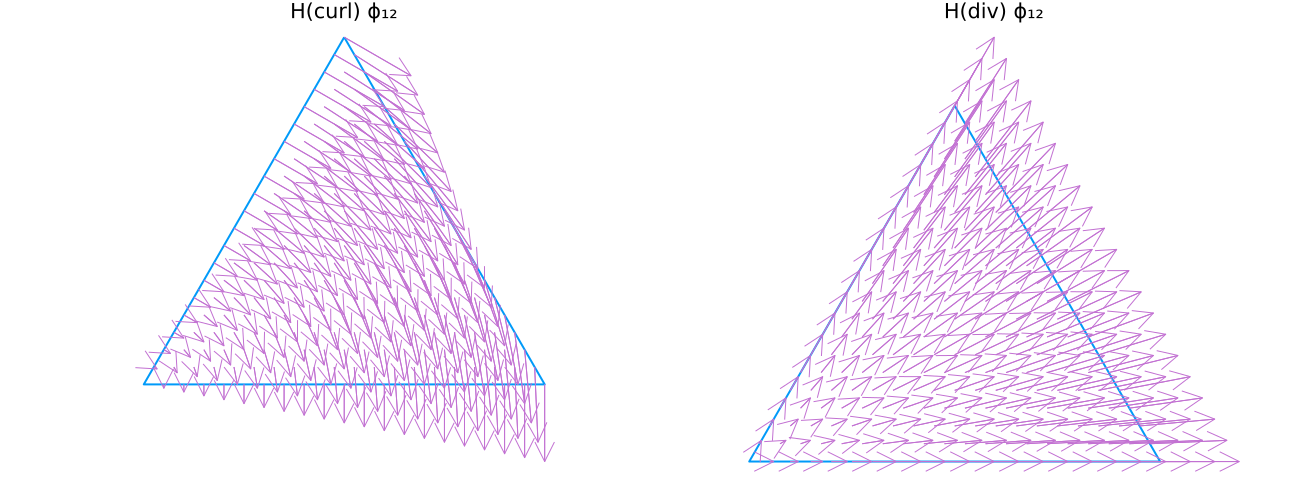

In [9]:
gr();
T₁ = [[0, 1] [sin(4π/3),cos(4π/3)] [sin(2π/3),cos(2π/3)]]
cycle=[1,2,3,1]
p = plot(T₁[1,cycle], T₁[2,cycle], c=1, aspect_ratio=:equal)
q = deepcopy(p)
λ = regular_grid(2, 20)
Dλ₁ = pinv(T₁)
Dλ₂ = pinv(T₂ .- mean(T₂,dims=2))
x₁ = T₁ * λ
x₂ = T₂ * λ
u₁ = (λ[1,:] * Dλ₁[3,:]' .- λ[3,:] * Dλ₁[1,:]') .* 0.5
u₂ = (λ[1,:] * Dλ₂[2,:]' .- λ[2,:] * Dλ₂[1,:]') .* 0.5
quiver!(p, x₁[1,:], x₁[2,:], l=1, c=4, quiver=(u₁[:,1], u₁[:,2]), title="H(curl) ϕ₁₂")
quiver!(q, x₁[1,:], x₁[2,:], l=1, c=4, quiver=(-u₁[:,2], u₁[:,1]), title="H(div) ϕ₁₂")
plt = plot(p,q,layout=(1,2), size=(1300,500))
plotlyjs()
plt

## FEEC organizes finite elements for simplices into two families: <br> _full_ and _trimmed_

$$\large \mathcal{P}_r \Lambda^k(\Delta_n) = \mathrm{span}\{p\ (\mathrm{d}\lambda)_\sigma: p \in \mathcal{P}_r(\Delta_n),\ |\sigma| = k\};$$

$$\large \mathcal{P}_r^- \Lambda^k(\Delta_n) = \mathrm{span}\{p\ \phi_\sigma: p \in \mathcal{P}_{r-1}(\Delta_n),\ |\sigma| = k+1\}.$$

**Full $\mathcal{P}_r \Lambda^k (\Delta_n)$**


- Brezzi-Douglas-Marini
- Nédélec 2nd kind

**Trimmed $\mathcal{P}_r^- \Lambda^k(\Delta_n)$**


- Raviart-Thomas
- Nédélec 1st kind

Nested spaces:

$$P_1^- \Lambda^k (\Delta_n) \subset P_1 \Lambda^k (\Delta_n) \subset P_2^- \Lambda^k (\Delta_n) \subset P_2 \Lambda^k (\Delta_n) \subset \cdots$$

(Diagrams by Mattias Schläger for <https://www-users.cse.umn.edu/~arnold/femtable/>)

![](./periodictable.png)

## Observation: trace-free $\neq$ vanishes on the boundary

![](./trace_free.gif)

![](./trace_free_tet.gif)

## Basic recipes for a trace-free $k$-form

The product of a **barycentric** $k$-form or a **Whitney form** with a **complementary bubble function**

$$\large
\begin{aligned}\lambda_{\sigma^*} (\mathrm{d} \lambda)_{\sigma}, && |\sigma| = k
\\
\lambda_{\sigma^*} \phi_{\sigma}, && \quad |\sigma| = k+1
\end{aligned}$$

# Trace-free $\cong$ unrestricted isomorphisms

In [23]:
T = [[1, 0, 0] [cos(2π/3), sin(2π/3), 0] [cos(4π/3), sin(4π/3), 0]]
cycle = [1,2,3,1]
p = plot(T[1,cycle], T[2,cycle], T[3,cycle], c=1)
q = deepcopy(p)
m = deepcopy(p)
s = LinRange(0,1,40)
f = sin.(3π.*s)
x = T[1:2,1:2] *  [(1 .- s)  s]'
plot!(p, x[1,:], x[2,:], f, c = 2, title="= f", l=4)
b = (1 .- s) .* s
plot!(q, x[1,:], x[2,:], b, c = 3, title="⋅ λₑ", l=4)
f̃ = copy(f)
f̃[2:end-1] ./= b[2:end-1]
f̃[1] = 3π
f̃[end] = 3π
plot!(m, x[1,:], x[2,:], f̃, c = 4, title="f̃", l=4)
plot(m,q,p, layout=(1,3), size=(1300, 500))

## State of the theory for differential forms _ex ante_

In

- _Finite element exterior calculus, homological techniques, and applications_ [Arnold, Falk & Winther (2006)](https://doi.org/10.1017/S0962492906210018)

- _Geometric decompositions and local bases for spaces of finite element differential forms_ [Arnold, Falk & Winther (2009)](https://doi.org/10.1016/j.cma.2008.12.017)

- _On basis construction in finite element exterior calculus_ [Licht (2018)](https://doi.org/10.1016/j.cma.2008.12.017)

![](./P3.png)

![](./P3hi.png)

![](./P3t.png)

![](./P3hi.png)

![](./P3t.png)

$$\begin{aligned}
(\mathring{\mathcal{P}}_r \Lambda^{\color{red}{k}} (\Delta_n))^*\ &\cong \mathcal{P}_{r-n+k}^- \Lambda^{\color{blue}{n-k}} (\Delta_n), & \varphi_j(\omega) &= \int_{\Delta_n} \omega \wedge \mu_j, & \mu_j \in \mathcal{P}_{r-n+k}^- \Lambda^{n-k} (\Delta_n)
\\
(\mathring{\mathcal{P}}_r^- \Lambda^{\color{red}{k}} (\Delta_n))^*\ &\cong \mathcal{P}_{r-n+k-1} \Lambda^{\color{blue}{n-k}} (\Delta_n), & \varphi_j(\omega) &= \int_{\Delta_n} \omega \wedge \mu_j, & \mu_j \in \mathcal{P}_{r-n+k-1} \Lambda^{n-k} (\Delta_n)
\end{aligned}$$

## Nevertheless, separate constructions for full and trimmed elements

### Full $\mathcal{P}_r \Lambda^k (\Delta_n)$

**trace-free construction:**

$$
\begin{aligned}
h: \mathcal{P}_{r - n + k}^-
\Lambda^{n-k}(\Delta_n) &\to
\mathring{\mathcal{P}}_r \Lambda^k (\Delta_n) \\
h: p \phi_{\sigma} &\mapsto p \lambda_{\sigma}
(\mathrm{d} \lambda)_{\sigma^*}
\end{aligned}
$$

### Trimmed $\mathcal{P}_r^- \Lambda^k(\Delta_n)$

**trace-free construction:**

$$
\begin{aligned}
h^-: \mathcal{P}_{r - n + k-1}
\Lambda^{n-k}(\Delta_n) &\to
\mathring{\mathcal{P}}_r^- \Lambda^k (\Delta_n) \\
h^-: p (\mathrm{d} \lambda)_{\sigma} &\mapsto p \lambda_{\sigma}
\phi_{\sigma^*}
\end{aligned}
$$

- $h$ and $h^-$ are defined through overdetermined requirements: <br> $\binom{n+1}{k}$ on a space of size $\binom{n}{k}$. <br>
One must prove $h$ and $h^-$ exist.

- Are they pointwise or not? (the decomposition at a point into $\{\phi_\sigma\}$ is non-unique)

  - if not pointwise, a particular basis must be used

- Do they define weight functions like $\|\cdot \|_{\lambda_e}$?

- Are they the same on the same inputs? $h \omega = h^- \omega$?

## Given the $\color{red}{k} \leftrightarrow \color{blue}{n-k}$ duality, why does the Hodge star $\star$ not appear?

$\mathrm{Alt}^2(\mathbb{R}^3)$

| $\sigma$ | | | | | |
| :-: | :-: | :-: | :-: | :-: | :-: |
| $\{1,2\}$ | $\color{red}{\mathrm{d}x_1}$ | $\wedge$ | $\color{red}{\mathrm{d}x_2}$ | $\wedge$ |  $\color{grey}{\mathrm{d}x_3}$ |
| $\{1,3\}$ | $\color{red}{\mathrm{d}x_1}$ | $\wedge$ | $\color{grey}{\mathrm{d}x_2}$ | $\wedge$ |  $\color{red}{\mathrm{d}x_3}$ |
| $\{1,4\}$ | $\color{grey}{\mathrm{d}x_1}$ | $\wedge$ | $\color{red}{\mathrm{d}x_2}$ | $\wedge$ |  $\color{red}{\mathrm{d}x_3}$ |

**$\star\mathrm{Alt}^2(\mathbb{R}^3) = \mathrm{Alt}^1(\mathbb{R}^1)$**

| | | | | | |
| :-: | :-: | :-: | :-: | :-: | :-: |
$+$ | $\color{grey}{\mathrm{d}x_1}$ | $\wedge$ | $\color{grey}{\mathrm{d}x_2}$ | $\wedge$ |  $\color{blue}{\mathrm{d}x_3}$ |
$-$ | $\color{grey}{\mathrm{d}x_1}$ | $\wedge$ | $\color{blue}{\mathrm{d}x_2}$ | $\wedge$ |  $\color{grey}{\mathrm{d}x_3}$ |
$+$ | $\color{blue}{\mathrm{d}x_1}$ | $\wedge$ | $\color{grey}{\mathrm{d}x_2}$ | $\wedge$ |  $\color{grey}{\mathrm{d}x_3}$ |

The Hodge star is **not affine invariant**: given $\varphi: T \to \hat T$,

$$\large \star  \neq \varphi^* \circ \star \circ \varphi^{-*}.$$

![](./not_affine.gif)

## Start by defining an affine-invariant star: $\star_T$ for simplex $T$


$$
\large
\begin{aligned}
&\star_T : \mathrm{Alt}^{n-k}\mathbb{R}^n \stackrel{\sim}{\rightarrow} \mathrm{Alt}^k\mathbb{R}^n \\
&\star_T : \omega \mapsto \frac{n!|T|}{\sqrt{n+1}} \underbrace{\sum_{\sigma}}_{\substack{\text{one for each} \\ (k-1)-\text{simplex}}} {\star(\omega \wedge (\mathrm{d} \lambda)_{\sigma})}\ (\mathrm{d}\lambda)_{\sigma}
\end{aligned}
$$

**Theorem.** $\star_T$ is affine invariant: for every invertible $\varphi: T \to \hat{T}$,

$$\large
\star_T \omega = \varphi^* \circ \star_{\hat{T}} \circ \varphi^{-*}.$$

**Theorem.** If $T$ is an equilateral simplex,

$$\large \star_T = \star.$$

![](./star_T.gif)

## A unified trace-free constructor

$$
\large
\begin{aligned}
&\mathring{\star}_T : \Lambda^{n-k}(\overline{T}) \stackrel{\sim}{\rightarrow} \mathring{\Lambda}^{k}(T) \\
&\mathring{\star}_T : \omega \mapsto n!|T| \sum_{\sigma} \underbrace{\star(\omega \wedge (\mathrm{d} \lambda)_{\sigma})}_{\text{pointwise action}} \underbrace{\lambda_{\sigma^*}}_{\text{complementary bubble}} (\mathrm{d}\lambda)_{\sigma}
\end{aligned}
$$

- Defined for all differential forms, not just full or trimmed polynomials
- Sum-of-outer-products form (not overdetermined)
- Acts pointwise
- Scaling constant $n!|T|$
so that

$$\large \mathring{\star}_T \circ \mathring{\star}_T = (-1)^{k(n-k)} \lambda_{T}$$

### Equivalent to $h$ and $h^-$ up to a sign convention

$$\large h^-: p (\mathrm{d} \lambda)_{\sigma} \mapsto p \lambda_{\sigma}\phi_{\sigma^*}, \quad h: p \phi_{\sigma} \mapsto p \lambda_{\sigma}
(\mathrm{d} \lambda)_{\sigma^*}$$
$$\large \mathring{\star}_T: p (\mathrm{d} \lambda)_{\sigma} \mapsto \pm p \lambda_{\sigma}
\phi_{\sigma^*}
, \quad \mathring{\star}_T: p \phi_{\sigma} \mapsto \pm p \lambda_{\sigma}
(\mathrm{d} \lambda)_{\sigma^*}$$

![](./ringo_T.gif)

## $\mathring{\star}_T$ defines a weighted $L^2$-inner product

$$\large \langle \omega, \mu \rangle_{\mathring{\star}_T} = \int_{T} n!|T| \sum_{\sigma}\lambda_{\sigma^*} {\star(\omega \wedge (d \lambda)_{\sigma})}\ {\star(\mu \wedge (d \lambda)_{\sigma})}$$

- This is the weight function to define bi-orthogonal basis/dual-basis pairs in the full and trimmed polynomials
- Pictured: indicatrix for $\langle \cdot, \cdot \rangle_{\mathring{\star}_T}$ for $1$-forms

![](./moving_indicatrix.gif)

### Utility of $\mathring{\star}_T$ for the different approaches

1. **Dual basis decomposition**

  - $\langle \cdot, \cdot \rangle_{\mathring{\star}_T}$-orthogonal dual basis functions $\to$ $\mathring{\star}_T$ is the Riesz map from the dual basis to the primal basis
  

2. **Bernstein polynomials**

  - Not really simpler than what you're already doing
  

3. **Dubiner-type basis**

  - Generalizes Sherwin-Karniadakis construction to all $k$-forms

## Theorem

$$
\begin{aligned}
&\mathring{\star} : \mathcal{P}_{r - n + k}^-
\Lambda^{n-k}(\Delta_n) &\stackrel{\sim}{\rightarrow}&
\mathring{\mathcal{P}}_r \Lambda^k (\Delta_n) \\
&\mathring{\star} : \mathcal{P}_{r - n + k -1}
\Lambda^{n-k}(\Delta_n) &\stackrel{\sim}{\rightarrow}&
\mathring{\mathcal{P}}_r^- \Lambda^k (\Delta_n) \\
&\mathring{\star} : 
\Lambda^{n-k}(\overline{\Delta_n}) &\stackrel{\sim}{\rightarrow}&
\mathring{\Lambda}^k (\overline{\Delta_n})
\end{aligned}
$$

# Extension operators

In [24]:
λ = regular_grid(2,20)
T = [[1, 0, 0] [cos(2π/3), sin(2π/3), 0] [cos(4π/3), sin(4π/3), 0]]
cycle = [1,2,3,1]
xy = T * λ
s = LinRange(0,1,40)
pullback = sin.(3π.*(λ[1,:] .+ λ[3,:] ./ 2)) ./ (λ[1,:] .+ λ[3,:] ./ 2) ./ (λ[2,:] .+ λ[3,:] ./ 2)
p = plot(T[1,cycle], T[2,cycle], T[3,cycle], c=1)
plot!(p, xy[1,:], xy[2,:], pullback, st=:mesh3d, c=4, title="P*f̃")
λₑ = λ[1,:] .* λ[2,:]
q = plot(T[1,cycle], T[2,cycle], T[3,cycle], c=1, title="⋅ λₑ")
plot!(q, xy[1,:], xy[2,:], λₑ, st=:mesh3d, c=3)
m = plot(T[1,cycle], T[2,cycle], T[3,cycle], c=1)
extension = pullback .* λₑ
plot!(m, xy[1,:], xy[2,:], extension, st=:mesh3d, c=2, title="= F")
plot(p, q, m, layout=(1,3), size=(1300, 500))

- $\lambda^\alpha =  \lambda_1^{\alpha_1} \lambda_2^{\alpha_2} \cdots$

- $P^*_\alpha$: pullback of $\alpha$-weighted projection

#### Full $\mathcal{P}_r \Lambda^k (\Delta_n)$

**extension operator:**

$$
\large
\begin{aligned}
E_r: \mathring{\mathcal{P}}_{r}
\Lambda^{k}(\Delta_d) &\to
\mathcal{P}_r \Lambda^k (\Delta_n) \\
E_r: \hat\lambda^{\alpha} (\mathrm{d} \hat\lambda)_{\sigma} &\mapsto
\lambda^{\alpha}P_\alpha^* (\mathrm{d}\hat\lambda)_\sigma
\end{aligned}
$$

#### Trimmed $\mathcal{P}_r^- \Lambda^k(\Delta_n)$

**extension operator:**

$$
\large
\begin{aligned}
E^-_r: \mathring{\mathcal{P}}_{r}^-
\Lambda^{k}(\Delta_d) &\to
\mathcal{P}_r^- \Lambda^k (\Delta_n) \\
E^-_r: \hat\lambda^{\alpha} \hat\phi_{\sigma} &\mapsto
\lambda^{\alpha}\phi_\sigma
\end{aligned}
$$

- both extension operators are in the _Bernstein_ (barycentric monomial) basis: **not pointwise**

- cannot be applied to general differential forms directly

- **incompatible:**

$$E_r \omega \neq E_r^- \omega$$

## Recall: trace-free $\neq$ vanishes on the boundary

![](./trace_free_tet.gif)

## Bubble decomposition

A trace-free $k$-form still has _perpendicular traces_ on boundary facets.  Every trace-free $k$-form can be decomposed into one bubble function for each facet that can have a perpendicular trace,

$$\large \underbrace{P_{T, f}^* \omega_f}_{\text{pullback}} \wedge \underbrace{\lambda_{f}}_{\text{bubble}}
\underbrace{\mathrm{d}\lambda_{T \setminus f}}_{\text{ perpendicular }(n-\mathrm{dim}(f))\text{ form}},$$

where $\omega_f$ is a $\mathrm{dim}(f) - (n-k)$-form that **vanishes** on $\partial_f$.

### Example: bubble decomposition of a Whitney form

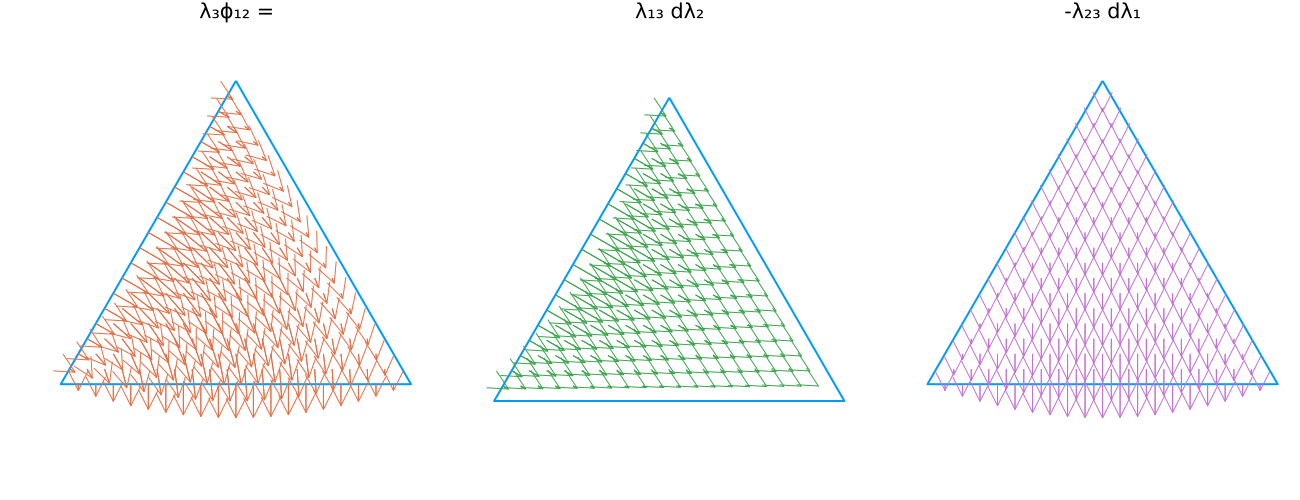

In [12]:
gr();
T₁ = [[0, 1] [sin(4π/3),cos(4π/3)] [sin(2π/3),cos(2π/3)]]
cycle=[1,2,3,1]
p = plot(T₁[1,cycle], T₁[2,cycle], c=1, aspect_ratio=:equal)
q = deepcopy(p)
r = deepcopy(p)
λ = regular_grid(2, 20)
Dλ₁ = pinv(T₁)
Dλ₂ = pinv(T₂ .- mean(T₂,dims=2))
x₁ = T₁ * λ
x₂ = T₂ * λ
u₁ = ((λ[2,:] .* λ[1,:]) * Dλ₁[3,:]')
u₂ = (- (λ[2,:] .* λ[3,:]) * Dλ₁[1,:]')
u₃ = u₁ .+ u₂
quiver!(p, x₁[1,:], x₁[2,:], l=1, c=2, quiver=(u₃[:,1], u₃[:,2]), title="λ₃ϕ₁₂ =")
quiver!(q, x₁[1,:], x₁[2,:], l=1, c=3, quiver=(u₁[:,1], u₁[:,2]), title="λ₁₃ dλ₂")
quiver!(r, x₁[1,:], x₁[2,:], l=1, c=4, quiver=(u₂[:,1], u₂[:,2]), title="-λ₂₃ dλ₁")
plt = plot(p,q,r,layout=(1,3), size=(1300,500))
plotlyjs()
plt

- Evaluating the bubble decomposition of $\omega$ does not require representing $\omega$ in a bubble-decomposition basis

  - This example shows that the bubble decomposition components of $\omega \in \mathcal{P}_r^- \Lambda^k(\Delta_n)$ are not necessarily in the same space
  

- Evaluating the bubble decomposition at a point can be accomplished by evaluating $O(1)$ (independent of $r$) projections: still pointwise

## A unified extension operation: pullback $\cdot$ bubble $\wedge$ perpendicular form

$$\large \dot{E}_{f,T}: \mathring{\Lambda}^k(\overline f) \to \Lambda^k (\overline e)$$

Partition trace-free functions based on a bubble function decomposition


$$\large \dot{E}_{f,T}:\ P_{f,e}^* \omega_e \wedge \lambda_{e}^{(f)} (\mathrm{d}\lambda^{(f)})_{f \setminus e} \mapsto P_{T, e}^* \omega_e 
\wedge \lambda_{e}(\mathrm{d}\lambda)_{f \setminus e}$$

This idea appears as a basis (not explicitly an extension operator) in [Ainsworth & Coyle (2003)](https://doi.org/10.1002/nme.847)

![](./ainsworth-coyle.png)

## Theorem

$$
\large
\begin{aligned}
&\dot E_{f,T}: \mathring{\Lambda}^k(\overline f) &\to \Lambda^k (\overline T) \\
&\dot E_{f,T}: \mathring{\mathcal{P}}_r \Lambda^k(f) &\to \mathcal{P}_r\Lambda^k (T) \\
&\dot E_{f,T}: \mathring{\mathcal{P}}_r^- \Lambda^k(f) &\to \mathcal{P}_r^-\Lambda^k (T) & &\text{[new contribution]}
\end{aligned}
$$

It is somewhat surprising that this operation extends the trimmed polynomial spaces faithfully: the decomposition based on perpendicular traces can't be used as a basis

### Sketch of proof that $\dot E_{f,T}: \mathring{\mathcal{P}}_r^- \Lambda^k(f) \to \mathcal{P}_r^-\Lambda^k (T)$

$$\large \dot{E}_{f,T}:\ P_{f,e}^* \omega_e \wedge \lambda_{e}^{(f)} (\mathrm{d}\lambda^{(f)})_{f \setminus e} \mapsto P_{T, e}^* \omega_e 
\wedge \lambda_{e}(\mathrm{d}\lambda)_{f \setminus e}$$

- This operation commutes with the **Koszul operator** centered at $e$ $\Rightarrow$ preserves trimmed status of each bubble individually
- $\therefore$ The Koszul operator centered at $f$ for a sum of bubbles only introduces a lower-order polynomial terms $\Rightarrow$ also preserves trimmed status

### Utility of $\dot{E}_f,T$ for the different approaches

1. **Dual basis decomposition**

  - None, extension operators are not explicitly evaluated
 

2. **Bernstein basis**

  - Not unless preserving trimmed / full subspaces is desired

3. **Dubiner-type**

  - Can be used in 3D without increasing the complexity of sum-factorization approaches, but not higher dimensions
  - Simpler projection operators (fewer function evaluations) exist for trimmed polynomials

## Corollary: unified geometric decomposition

Two pointwise operators define the geometric composition for all differential forms on a simplex

$$
\begin{aligned}
\Lambda^k (\overline \Delta_n) &=
\bigoplus_{f\in\Delta_n} \dot{E}_{f,\Delta_n} \mathring{\star}_f [\Lambda^k (\overline f)]
\\
\mathcal{P}_r \Lambda^k (\overline \Delta_n) &=
\bigoplus_{f\in\Delta_n} \dot{E}_{f,\Delta_n} \mathring{\star}_f [\mathcal{P}_{r - \mathrm{dim}(f) + k}^- \Lambda^k (\overline f)]
\\
\mathcal{P}_r^- \Lambda^k (\overline \Delta_n) &=
\bigoplus_{f\in\Delta_n} \dot{E}_{f,\Delta_n} \mathring{\star}_f [\mathcal{P}_{r - \mathrm{dim}(f) + k - 1} \Lambda^k (\overline f)]
\\
\end{aligned}
$$

# Thank you!